# Depth Profileの計算

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from glob import glob

from ase.io import lammpsdata, read
import os

from mlptools.analyzer.depth_profile import DepthProfileCalculator

x_width = round(5.43 * 7.5, 2)
y_width = round(5.43 * 7.5, 2)
z_width = round(5.43 * 25.0, 2)
upper_limit = 5.43 * 27.5
ang3tocm3 = 1.0e24

path2dump = "/Users/y1u0d2/desktop/Lab/result/lammps/Si/sputtering/ml/model_21/argon/0deg_1000eV/data_traj"
data_files = glob(f"{path2dump}/data.Si.*")
# sort data_files by the number * in data.Si.* 
data_files = sorted(data_files, key=lambda x: int(x.split(".")[-1]))
print(f"Number of data files: {len(data_files)}")

Number of data files: 2000


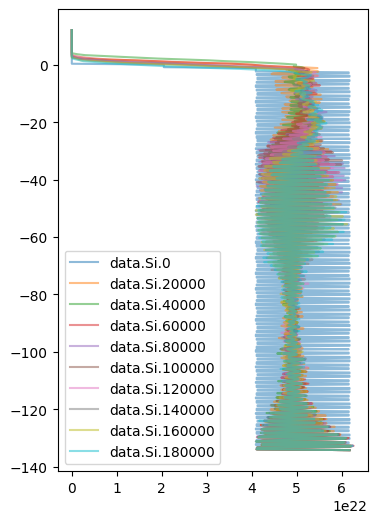

In [6]:
lmp_type_dict = {
    1: 14,
    2: 18,
}

fig, ax = plt.subplots(figsize=(4, 6))
for path2structure in data_files[:10]:
    depth_profile_calculator = DepthProfileCalculator()
    atoms = lammpsdata.read_lammps_data(file=path2structure, style='atomic', Z_of_type=lmp_type_dict)
    depth_profile_df = depth_profile_calculator.get_depth_profile(
        atoms=atoms,
        atom_type=14,
        x_width=x_width,
        y_width=y_width,
        z_width=z_width,
        upper_limit=upper_limit,
        step=0.3
    )
    ax.plot(depth_profile_df['ma'], depth_profile_df['linspace'], alpha=0.5, label=os.path.basename(path2structure))
ax.legend()